In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
path="/content/archive.zip"
df=pd.read_csv(path)
df.head(2003)

FileNotFoundError: ignored

In [ ]:
df.shape

(9823, 7)

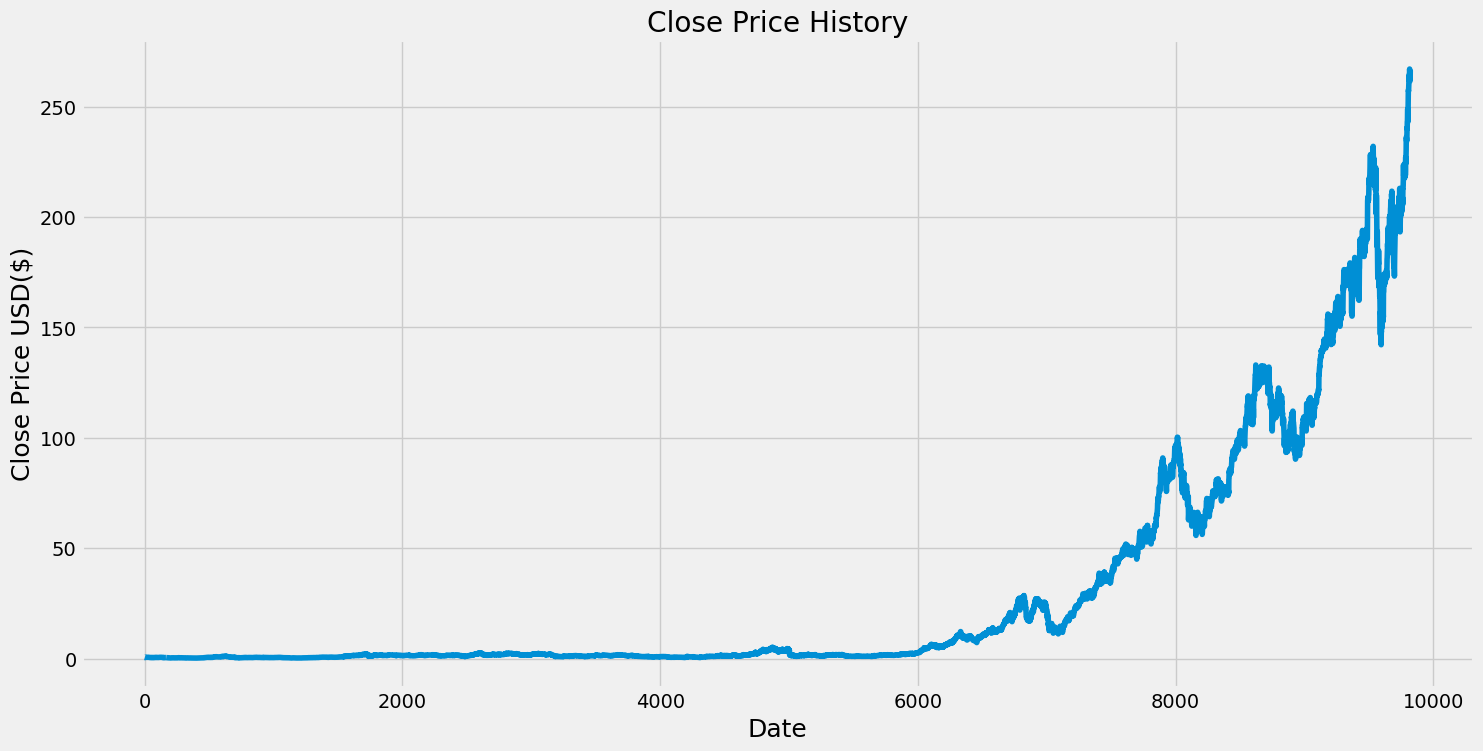

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

7859

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.18755996e-03],
       [1.08720162e-03],
       [9.53392993e-04],
       ...,
       [9.80929458e-01],
       [9.80067682e-01],
       [9.97264889e-01]])

In [ ]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00118756, 0.0010872 , 0.00095339, 0.00099521, 0.00104539,
       0.00115411, 0.0012461 , 0.00132973, 0.00143845, 0.00163917,
       0.00167262, 0.00161408, 0.00154717, 0.00157226, 0.00152209,
       0.00142173, 0.00132973, 0.00128792, 0.00139664, 0.00137991,
       0.00130464, 0.00131301, 0.00135482, 0.00133809, 0.00146354,
       0.00139664, 0.00143845, 0.00146354, 0.00145518, 0.00142173,
       0.001405  , 0.00133809, 0.00126283, 0.00115411, 0.00104539,
       0.00111229, 0.0011792 , 0.0011792 , 0.00118756, 0.0010872 ,
       0.0010872 , 0.00102866, 0.00101193, 0.00097012, 0.00101193,
       0.0010872 , 0.00097848, 0.00088649, 0.00091158, 0.00085303,
       0.00095339, 0.00097848, 0.00103702, 0.00104539, 0.0010203 ,
       0.00100357, 0.00099521, 0.00097848, 0.00084467, 0.00076941])]
[0.0007108634591285375]



In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)


In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(7799, 60, 1)

In [ ]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

7799/7799 [==============================] - 336s 42ms/step - loss: nan


In [ ]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

62/62 [==============================] - 2s 18ms/step


In [ ]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

nan

<ipython-input-23-9fc034af5c2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


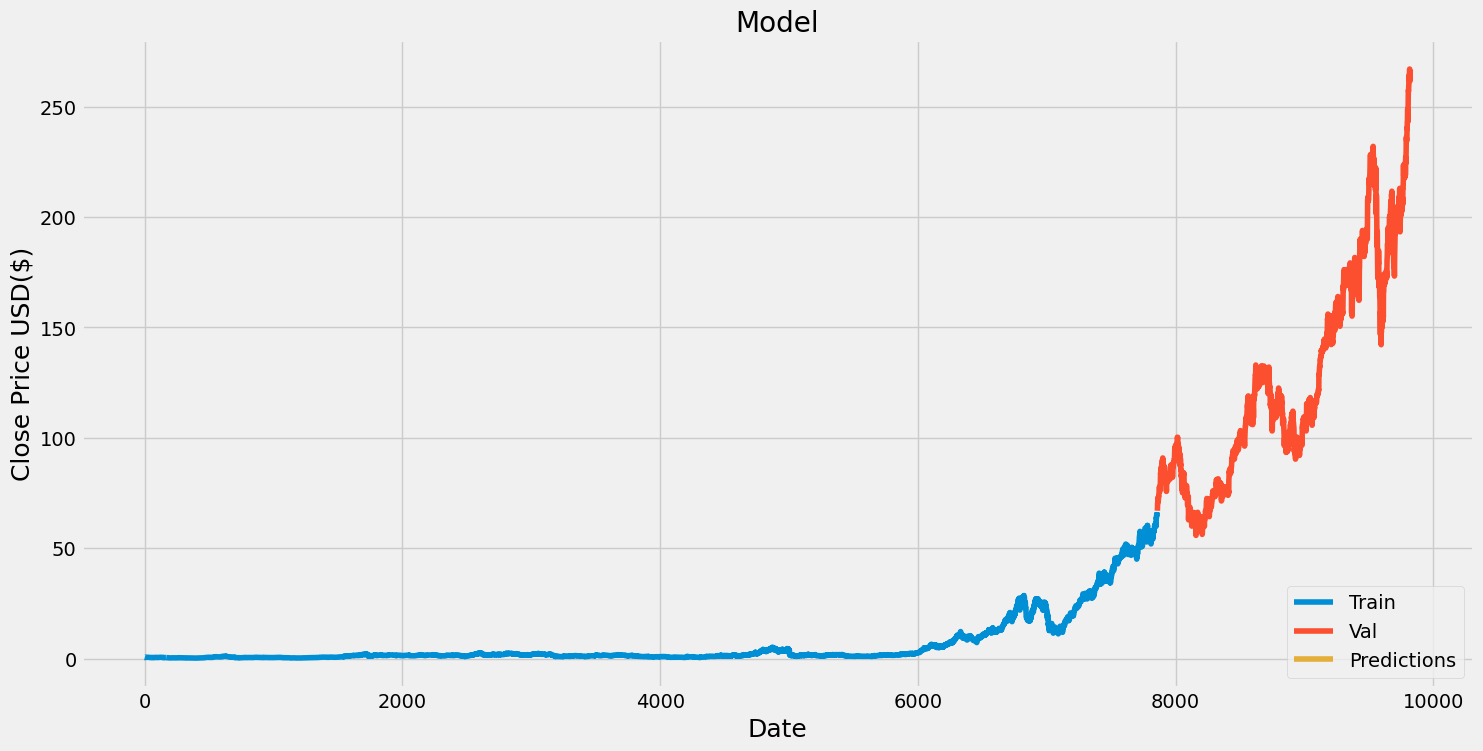

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.plot(train['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
7859,66.975716,NaN
7860,68.097145,NaN
7861,70.452858,NaN
7862,70.488571,NaN
7863,71.800003,NaN
...,...,...
9818,266.290009,NaN
9819,263.190002,NaN
9820,262.010010,NaN
9821,261.779999,NaN


In [ ]:
path="/content/archive.zip"
df=pd.read_csv(path)
df.head(20)
new_df=df.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 41ms/step
[[nan]]
